In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

## **Exercise 1: Nonlinear models: Analysis of spinal bone mineral density data**

In [ ]:
sbp = pd.read_csv('spnbmd.csv') # Importing data
print(sbp)

      idnum ethnic   age  sex  spnbmd
0         1  White  11.2  mal   0.719
1         1  White  12.2  mal   0.732
2         1  White  13.2  mal   0.776
3         1  White  14.3  mal   0.781
4         2  White  12.7  mal   0.620
...     ...    ...   ...  ...     ...
998     427  Black  18.8  fem   1.210
999     428  Black  14.9  fem   1.253
1000    428  Black  16.1  fem   1.251
1001    429  Asian   9.1  fem   0.635
1002    429  Asian  10.1  fem   0.653

[1003 rows x 5 columns]


In [ ]:
m = sbp.loc[sbp['sex']=='mal'] # Filtering rows by gender
f = sbp.loc[sbp['sex']=='fem']

w = sbp.loc[sbp['ethnic']=='White'] # Filter rows by ethnicity
a = sbp.loc[sbp['ethnic']=='Asian']
h = sbp.loc[sbp['ethnic']=='Hispanic']
b = sbp.loc[sbp['ethnic']=='Black']

In [ ]:
ma = m.sort_values(by=['age']) # Sorting age values for spling
fa = f.sort_values(by=['age'])

wa = w.sort_values(by=['age'])
aa = a.sort_values(by=['age'])
ha = h.sort_values(by=['age'])
ba = b.sort_values(by=['age'])

spl_m = UnivariateSpline(ma['age'], ma['spnbmd'])
spl_f = UnivariateSpline(fa['age'], fa['spnbmd'])

spl_w = UnivariateSpline(wa['age'], wa['spnbmd']) # Creating splines
spl_a = UnivariateSpline(aa['age'], aa['spnbmd'])
spl_h = UnivariateSpline(ha['age'], ha['spnbmd'])
spl_b = UnivariateSpline(ba['age'], ba['spnbmd'])

### Task 1: Visualize the data by generating a plot of Relative Spinal bone mineral density measurement (spnbmd) against age for the two genders. Color code the data points by gender. Next, fit a smoothing spline to each of male and female data (using the same color scheme).

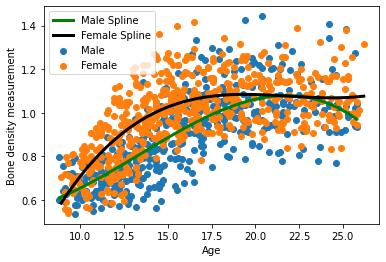

In [ ]:
plt.scatter(m['age'], m['spnbmd'], label='Male')
plt.scatter(f['age'], f['spnbmd'], label='Female')
plt.plot(ma['age'], spl_m(ma['age']), 'g', lw=3, label='Male Spline')
plt.plot(fa['age'], spl_f(fa['age']), 'k', lw=3, label='Female Spline')
plt.xlabel("Age")
plt.ylabel("Bone density measurement")
plt.legend(loc='upper left')

### Task 2: Repeat Task 1, but this time for the different ethnic groups.

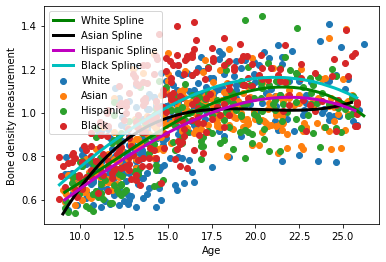

In [ ]:
plt.scatter(w['age'], w['spnbmd'], label='White')
plt.scatter(a['age'], a['spnbmd'], label='Asian')
plt.scatter(h['age'], h['spnbmd'], label='Hispanic')
plt.scatter(b['age'], b['spnbmd'], label='Black')
plt.plot(wa['age'], spl_w(wa['age']), 'g', lw=3, label='White Spline')
plt.plot(aa['age'], spl_a(aa['age']), 'k', lw=3, label='Asian Spline')
plt.plot(ha['age'], spl_h(ha['age']), 'm', lw=3, label='Hispanic Spline')
plt.plot(ba['age'], spl_b(ba['age']), 'c', lw=3, label='Black Spline')
plt.xlabel("Age")
plt.ylabel("Bone density measurement")
plt.legend(loc='best')

### Task 3: What conclusions can you draw from the results?

### Females have a higher relative change in BMD than males as the age increases. Between the age of 21-22 the rate of change of both male and female are approximately the same but then males BMD starts to decrease. Hence, females have stronger bones than males between the age of 10 and 26.

### The BMD rate of change is higher on Asian's than White and Hispanic individuals between the age of 10-15, but than decays. White, Black and Hispanic individuals have a constant increase in the rate of change of BMD compared to Asian's. Black individuals have the highest relative change in the BMD than other ethnicity groups. Therefore, Black individuals tend to have stronger bones than other ethnicity groups between the age of 10 and 26.

## **Exercise 2: Unsupervised Learning: Visualization and Clustering of NCI DNA microarray data**

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
nci = pd.read_csv('nci.data.csv').drop(['Unnamed: 0'], axis=1)
nci_labels = pd.read_csv('nci.label.txt')
print(nci)
print(nci_labels)

         s1        s2     s3       s4  ...      s61    s62      s63      s64
0     0.300  0.679961  0.940  0.28000  ... -0.27000  0.210 -0.05000  0.35000
1     1.180  1.289961 -0.040 -0.31000  ...  0.63000 -0.620  0.14000 -0.27000
2     0.550  0.169961 -0.170  0.68000  ... -0.10000 -0.150 -0.09000  0.02000
3     1.140  0.379961 -0.040 -0.81000  ...  1.10000 -1.330 -1.26000 -1.23000
4    -0.265  0.464961 -0.605  0.62500  ...  1.04500  0.045  0.04500 -0.71500
...     ...       ...    ...      ...  ...      ...    ...      ...      ...
6825 -0.030 -0.860039 -0.150 -0.30000  ... -0.16000  0.390 -0.35000  0.48000
6826  0.000 -1.250049  0.000 -1.15001  ... -0.02001  0.000 -0.36001  0.96999
6827  0.280 -0.770039 -0.120  1.09000  ... -0.64000  0.160 -0.49000  0.29000
6828 -0.340 -0.390039 -0.410 -0.26000  ... -0.37000  2.030  0.01000 -0.15000
6829 -1.930 -2.000039  0.000 -1.10000  ... -0.43000  3.940 -1.72000  1.21000

[6830 rows x 64 columns]
   CNS          
0    CNS        
1    CNS        

### Task 1: Visualize a small part of the data by generating a heatmap that shows 50 randomly chosen rows of the data. The x and y axes should be the rows and columns, and the z‐axis should be the level of expression (color coded from negative or under‐expressed to positive / over‐expressed)

Text(33.0, 0.5, 'Individual Genes')

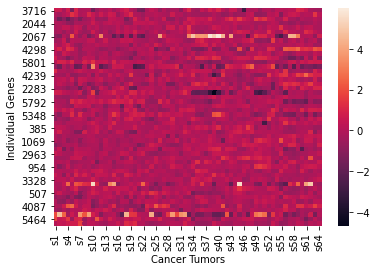

In [ ]:
t = nci.sample(50) # Randomly pick 50 samples from dataset
sb.heatmap(t)
plt.xlabel("Cancer Tumors")
plt.ylabel("Individual Genes")

### Task 2: Apply K‐means clustering to the data and obtain an optimal K. Illustrate your work graphically as appropriate (e.g. when varying K). Recall that we do not use labels in clustering. However, we should examine which labels are associated with which clusters after clustering is done.

In [8]:
k = []
wss = []

for i in range(1, 16): # Varying K
  kmeans = KMeans(n_clusters=i).fit(nci) # Fit model with K clusters
  kinit = kmeans.inertia_ # Get inertia from model
  wss.append(kinit)
  k.append(i)

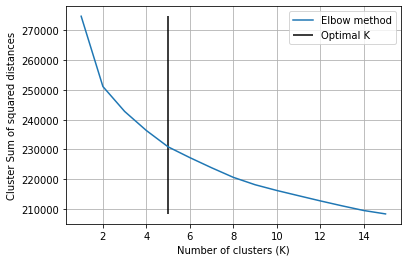

In [11]:
plt.plot(k, wss, label="Elbow method")
plt.vlines(x=5, ymin=min(wss), ymax=max(wss), label="Optimal K") # vertical line
plt.xlabel("Number of clusters (K)")
plt.ylabel("Cluster Sum of squared distances")
plt.grid()
plt.legend()

In [ ]:
print(kmeans.labels_[:20])
print(nci_labels[:20])

[ 8  8  8  0  8  8 14 14  8  8 14  5  0 14 13  7  5  8 14 14]
     CNS          
0      CNS        
1      CNS        
2      RENAL      
3       BREAST    
4       CNS       
5       CNS       
6     BREAST      
7     NSCLC       
8        NSCLC    
9   RENAL         
10      RENAL     
11    RENAL       
12    RENAL       
13    RENAL       
14  RENAL         
15   RENAL        
16         BREAST 
17     NSCLC      
18    RENAL       
19     UNKNOWN    


### Task 3: Apply agglomerative hierarchical clustering to the data and obtain two dendrograms, one for each type of linkage of your choice. Recall that we covered four types of linkage: complete, single, mean, and centroid. Mean and complete tend to result in evenly sized clusters.

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with Ward Linkage')

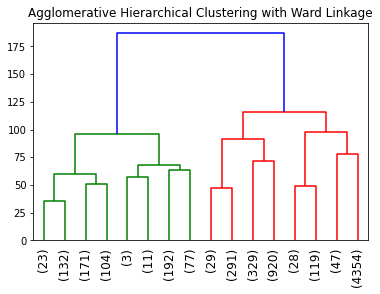

In [24]:
avg_agglo_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(nci)
plot_dendrogram(avg_agglo_clustering, truncate_mode='level', p=3, leaf_rotation=90.)
plt.title("Agglomerative Hierarchical Clustering with Ward Linkage")

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with Complete Linkage')

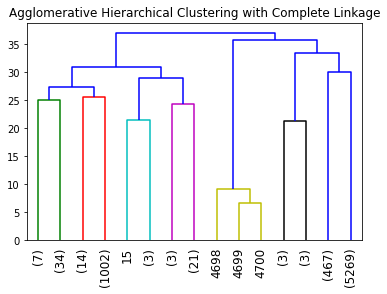

In [26]:
comp_agglo_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(nci)
plot_dendrogram(comp_agglo_clustering, truncate_mode='level', p=3, leaf_rotation=90.)
plt.title("Agglomerative Hierarchical Clustering with Complete Linkage")